In [ ]:
''' 
Aim: Implement probabilistic PCA and factor analysis algorithms.

PCA and factor analysis are two dimensionality reduction techniques that model the 
underlying structure of the data in different ways.

PPCA is a probabilistic version of PCA that assumes the data is generated from
a linear model with Gaussian noise. The goal is to find a lower-dimensional latent space
from which the data is drawn

Factor analysis assumes that the observed data can be explained by a smaller
set of latent factors with Gaussian noise. It tries to model the covariance structure of the
data
'''

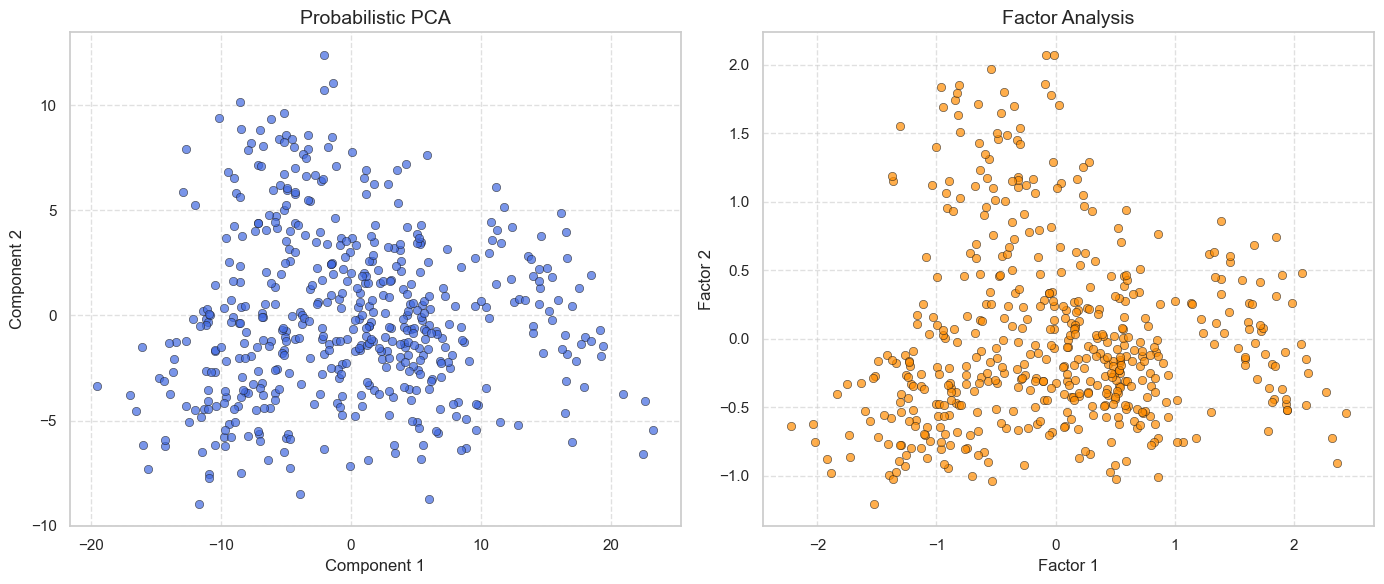

Explained Variance Ratio (PPCA): [0.59261945 0.14064393]


In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.datasets import make_multilabel_classification

# Generate synthetic data
np.random.seed(42) #Ensures reproducibility
n_samples = 500 
n_features = 5
#Generating 500 samples and 5 features using make_multilabel_classification
X, _ = make_multilabel_classification(n_samples=n_samples, n_features=n_features, n_classes=2, random_state=42)
# _ : Target variables are ignored as they are not used in PCA or FA)

# Apply Probabilistic PCA (To reduce dataset to 2 components)
ppca = PCA(n_components=2, svd_solver='full') # PPCA with full SVD (Single value decomposition) solver 
X_ppca = ppca.fit_transform(X)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X)

# Set Seaborn style
sns.set(style="whitegrid")

# Creating 1 row and 2 columns subplots 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Probabilistic PCA
sns.scatterplot(x=X_ppca[:, 0], y=X_ppca[:, 1], alpha=0.7, edgecolor='k', color='royalblue',
ax=axes[0])
axes[0].set_title('Probabilistic PCA', fontsize=14)
axes[0].set_xlabel('Component 1', fontsize=12)
axes[0].set_ylabel('Component 2', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Factor Analysis
sns.scatterplot(x=X_fa[:, 0], y=X_fa[:, 1], alpha=0.7, edgecolor='k', color='darkorange',
ax=axes[1])
axes[1].set_title('Factor Analysis', fontsize=14)
axes[1].set_xlabel('Factor 1', fontsize=12)
axes[1].set_ylabel('Factor 2', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print explained variance for PPCA
print("Explained Variance Ratio (PPCA):", ppca.explained_variance_ratio_)